## (1)  Plotting two images using a 7x7 and a 3x3 median filter.

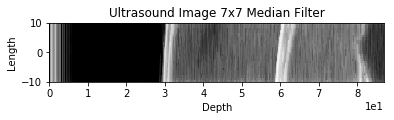

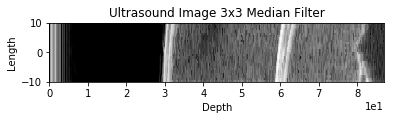

In [29]:
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('SingleUSSignalI.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.uint16)
L=len(Line)
f.close() #close the file
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,L/125e6,1/125e6)  #start,stop,step

from scipy.signal import medfilt

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

# I am filtering using a 7x7 median filter
ImageF=medfilt(Image,7)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 7x7 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


# I am filtering using a 3x3  median filter.
ImageF=medfilt(Image,3)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 3x3 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Discussion 
As we can see after the comparing the results of 3x3 and a 7x7 median filter, we see that the 3x3 median filter still holds certain amount of noise which needs further filtereing as a result we saw in 7x7 median filter which is quite clear 

# (2) Electrical Matching.

As we know the impedance of the transducer has a real part and an imaginary part i.e. its of the form R + jX . The two possible solution for impedence 529 + j274 is ' R + jwL ' and ' R + j/wC' where 'L' and 'C' are the inductance and the capcitance respectively. ( w = angular frequency = 2 x pi x frequency = 31.4 radians/sec)( frequency = 5 MHz)

#### Calculation. ( with w= 31.4 rad/sec)

compairing R + jwL with 529 + j274.


we get,    wL=  274.


or,        L = 274/w

or,        L = 274/31.4.

or,         L = 8.7 Henry ( 1st Solution)

Now, comparing R + j/wC with 529 +j274.

we get,   wC = 1/274

or,       C = 1/274 x 1/w


or,       C = 1/274  x 1/31.4 


or,       C = 116.23 uF ( 2nd Solution)


##### Reference :  http://hyperphysics.phy-astr.gsu.edu/hbase/electric/impcom.html


# Ultrasound Signal

# (1)

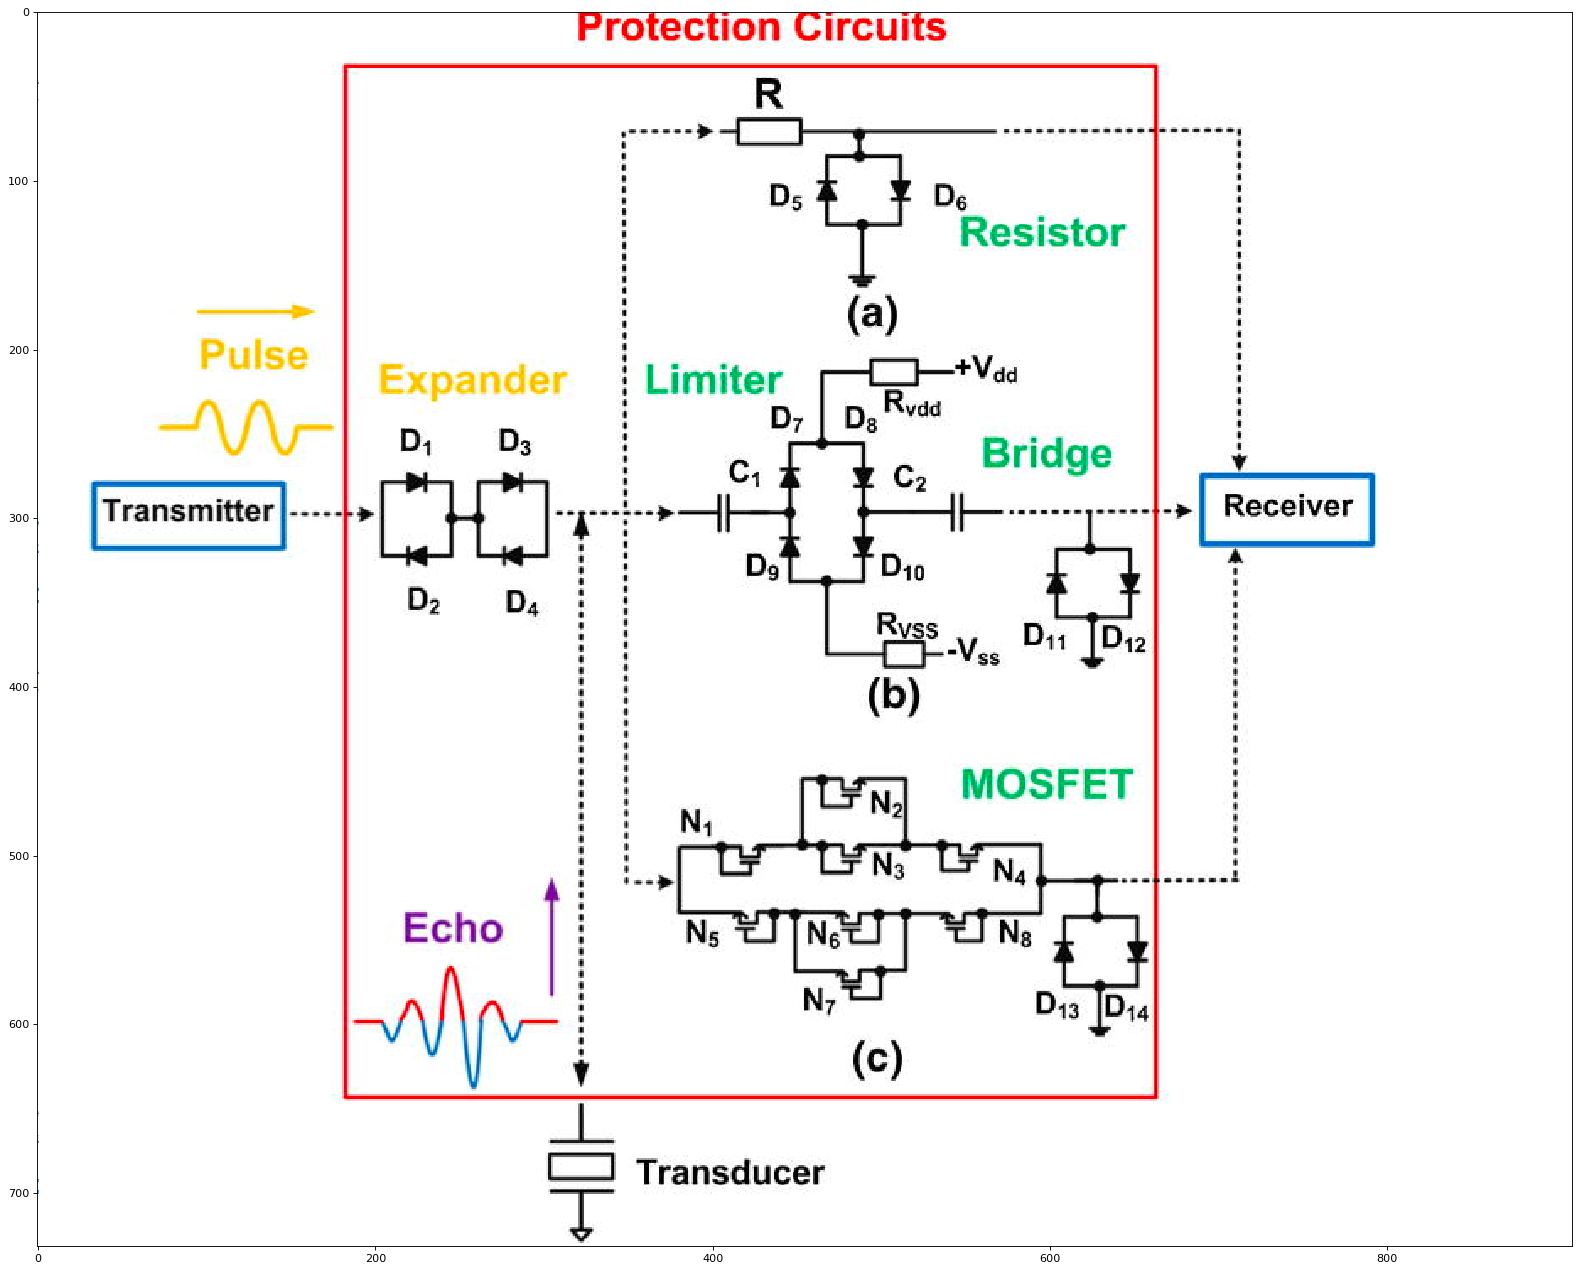

In [34]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig=plt.figure(figsize=(20, 16), dpi= 80, facecolor='w', edgecolor='k')


limit = novice.open('Limiter.png')
limit.show()

This circuit is needed to protect the transducer from the noise levels and also prevents the un-desired voltage signals from reaching the receivers. The limiter circuit generally have a resisitor and a diopde coupled with each other . It has a limited bandwidth. With respect to the transducer, this could be implemented just after the piezoelctric transducer so that the output of the transducer is controlled as well as limited in a certain range of mili volts. 

It could be used before digitizing the signal so that the analog to digital conversion becomes more easy and precise. Changing the order magnitude of the voltage from 900v to 5 mili volt peak to peak  requires de-amplification , therefore its right to connect limiter circuits after amplification .










# (2)

I would not recommend to use amplifier for acqisition of our signal , as we have a medium such as water and there is not significant loss of the signal or addition of noise . Since after that we are using the hilbert transform that involves taking fast fourier transform , rotation of fourier coefficients and then again taking the inverse fourier transform of the signal . Thus our signal is captured fully and images are formed on the basis of the data received. 